### SatelliteBench

* [Dataset](https://physionet.org/content/multimodal-satellite-data/1.0.0/)

* [Paper](https://arxiv.org/abs/2401.11114)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/satellitedata/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.Labels = df.Labels.astype(str)
df.head()

,Labels,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,image_embedding_6,image_embedding_7,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,2,train,-0.013127,-0.022996,-0.049374,-0.006306,0.013601,-0.003762,-0.033799,0.111063,...,0.000548,-0.055972,0.001507,0.011127,-0.009778,0.005803,0.001843,-0.028134,-0.006259,0.012655
1,0,train,-0.004921,0.019771,0.008914,-0.031568,0.036409,-0.022045,0.006442,0.057546,...,0.000217,-0.054641,-0.000246,0.012740,-0.008359,0.007162,-0.001369,-0.028130,-0.005280,0.016066
2,1,train,-0.004083,0.026789,-0.013088,0.005105,0.021876,-0.011500,0.008539,0.040801,...,0.001468,-0.056921,0.001435,0.011281,-0.011325,0.007478,0.001793,-0.028825,-0.005856,0.014624
3,2,train,0.016927,0.023699,0.003352,-0.025717,0.001321,-0.026542,0.012658,0.108271,...,-0.000296,-0.056390,0.002900,0.009952,-0.010178,0.008410,0.000744,-0.029097,-0.006146,0.014537
4,2,train,-0.023762,0.020299,0.010403,-0.023788,0.058685,-0.028156,0.017118,0.055509,...,0.002628,-0.056042,-0.001506,0.012937,-0.008904,0.006363,0.004434,-0.027852,-0.003943,0.013726


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'Labels'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (936, 1026)
Test Shape: (312, 1026)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 131843


STAGE:2024-02-08 15:07:28 57935:57935 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.2692, macro-f1: 0.1414
Epoch 1/15 - Training Time: 0.17 seconds | Inference Time: 0.07 seconds
Epoch 2/15 - Test Accuracy: 0.9968, macro-f1: 0.9959
Epoch 2/15 - Training Time: 0.13 seconds | Inference Time: 0.08 seconds
Epoch 3/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 3/15 - Training Time: 0.17 seconds | Inference Time: 0.09 seconds
Epoch 4/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 4/15 - Training Time: 0.21 seconds | Inference Time: 0.09 seconds
Epoch 5/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 5/15 - Training Time: 0.21 seconds | Inference Time: 0.09 seconds
Epoch 6/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 6/15 - Training Time: 0.20 seconds | Inference Time: 0.09 seconds
Epoch 7/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 7/15 - Training Time: 0.18 seconds | Inference Time: 0.09 seconds
Epoch 8/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 8/15 - Training Time: 0.21 seconds | Inference Time: 0.10 seconds


STAGE:2024-02-08 15:07:32 57935:57935 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 15:07:32 57935:57935 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        46.70%        1.440s        47.02%        1.450s       4.394ms      73.23 Mb      73.12 Mb           330  
                                         training_batch         5.25%     161.898ms        46.09%        1.421s       6.316ms     -54.22 Mb     -56.26 Mb           225  
                                   DataParallel.forward         3.59%     110.621ms        18.20%     561.152ms       1.871ms      68.99 Mb     -32.22

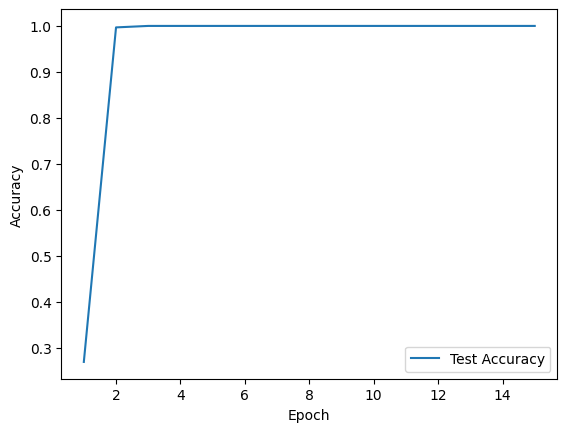

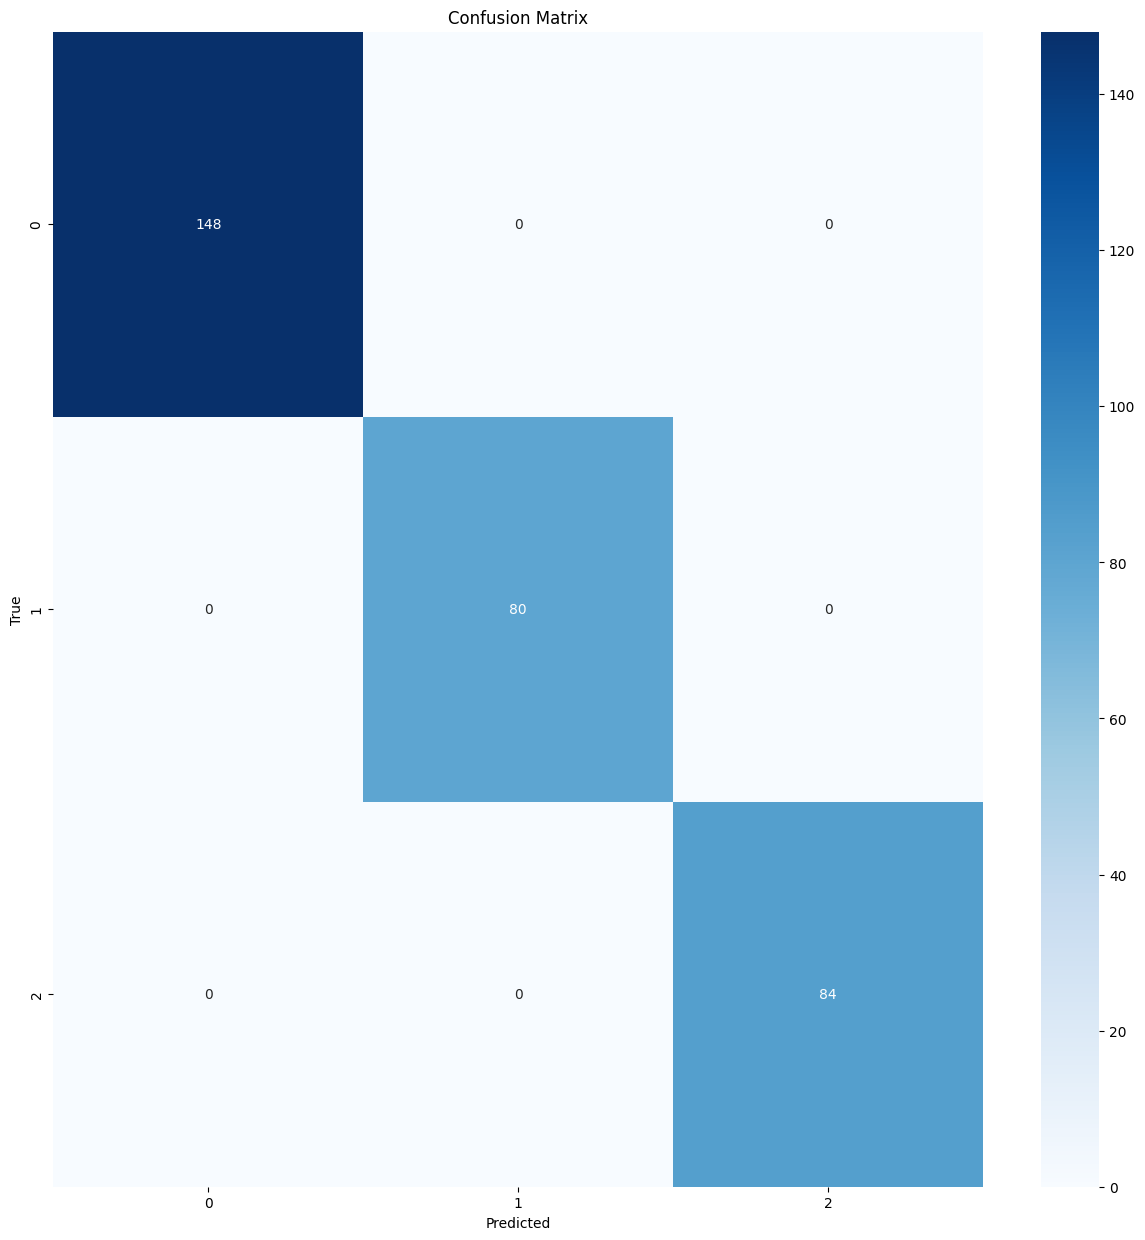

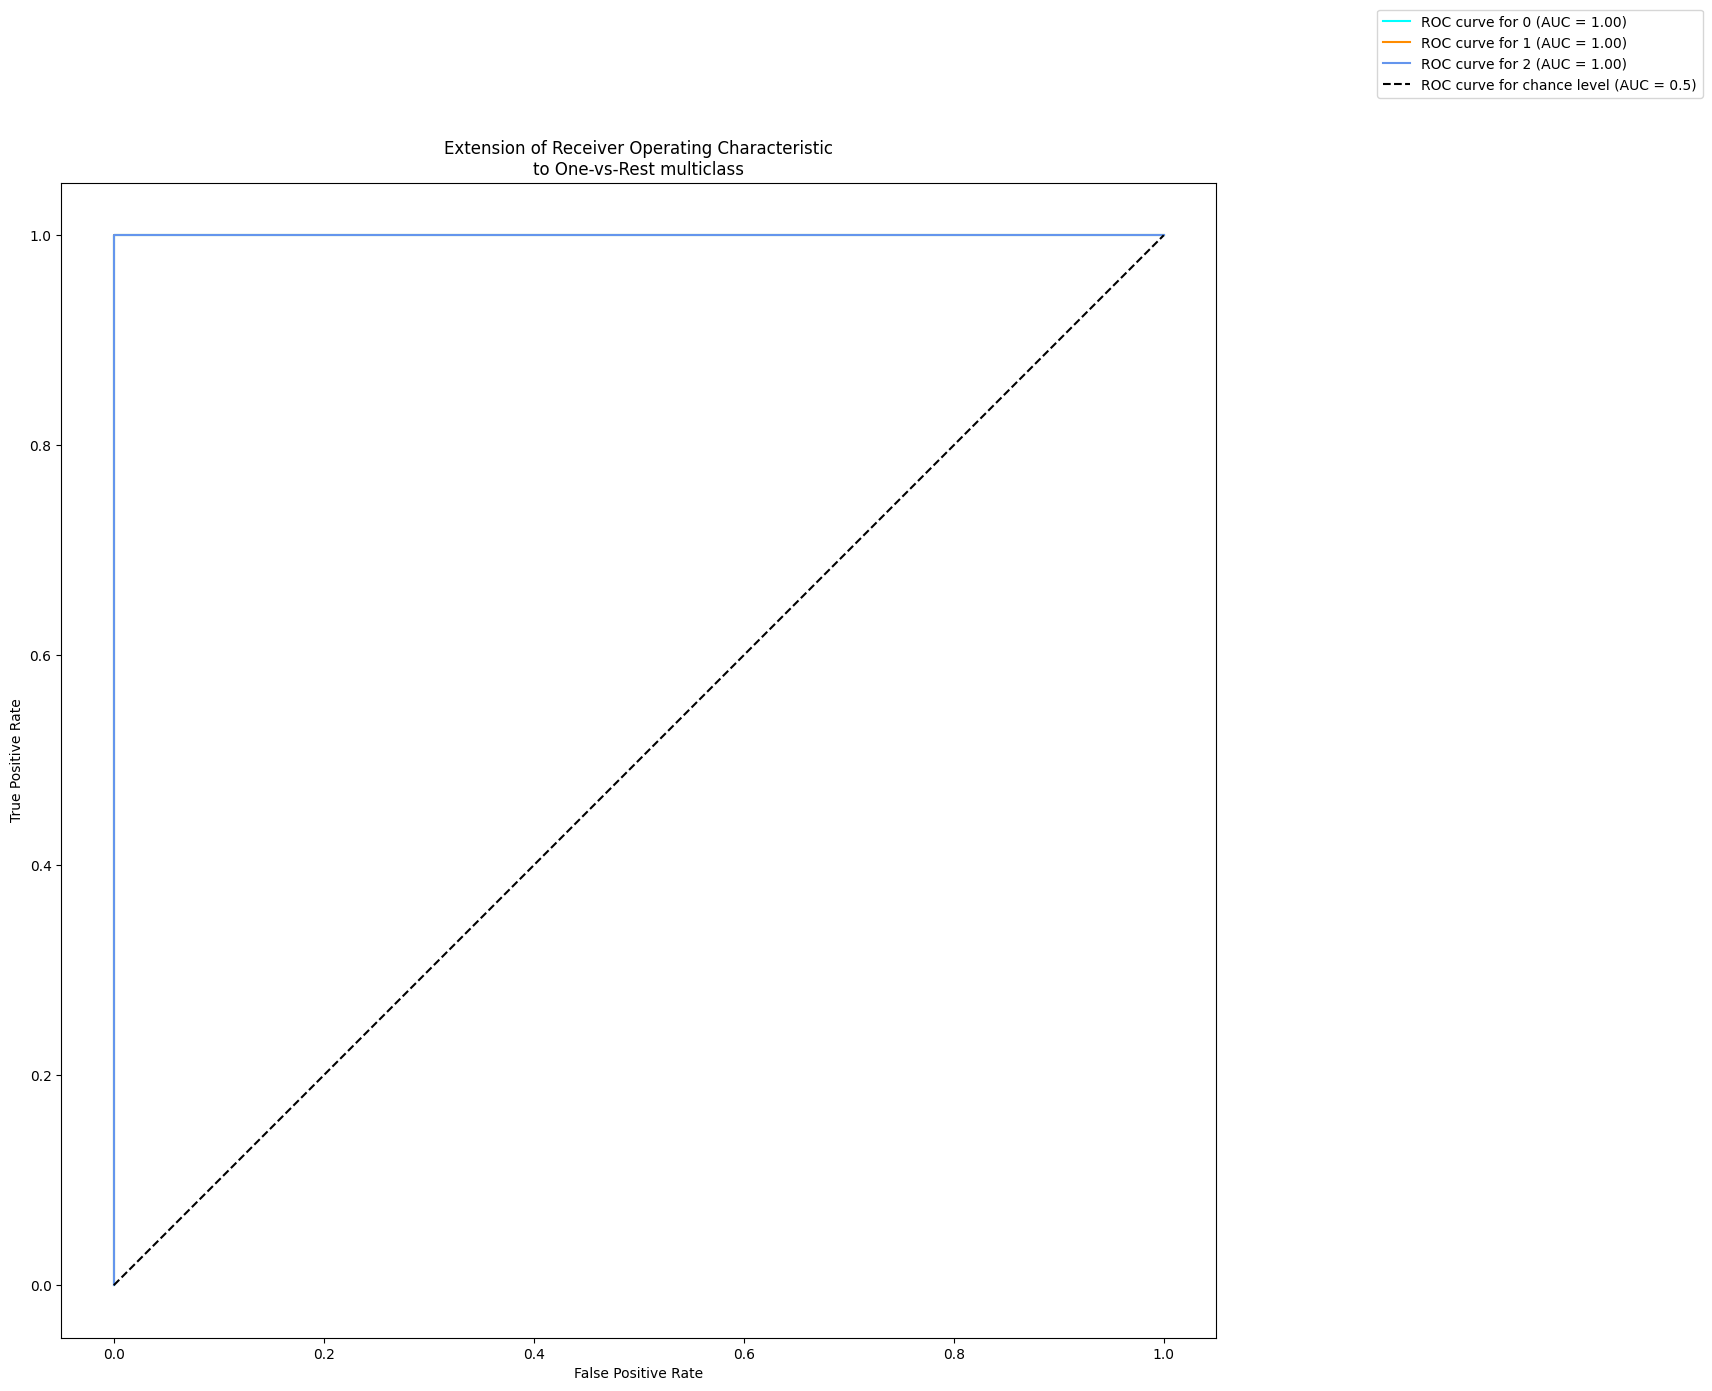

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        84

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66307


STAGE:2024-02-08 15:07:42 57935:57935 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.2853, macro-f1: 0.2101
Epoch 1/15 - Training Time: 0.21 seconds | Inference Time: 0.10 seconds
Epoch 2/15 - Test Accuracy: 0.9712, macro-f1: 0.9634
Epoch 2/15 - Training Time: 0.16 seconds | Inference Time: 0.11 seconds
Epoch 3/15 - Test Accuracy: 0.9968, macro-f1: 0.9959
Epoch 3/15 - Training Time: 0.21 seconds | Inference Time: 0.10 seconds
Epoch 4/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 4/15 - Training Time: 0.22 seconds | Inference Time: 0.09 seconds
Epoch 5/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 5/15 - Training Time: 0.20 seconds | Inference Time: 0.09 seconds
Epoch 6/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 6/15 - Training Time: 0.20 seconds | Inference Time: 0.10 seconds
Epoch 7/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 7/15 - Training Time: 0.21 seconds | Inference Time: 0.11 seconds
Epoch 8/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 8/15 - Training Time: 0.20 seconds | Inference Time: 0.08 seconds


STAGE:2024-02-08 15:07:47 57935:57935 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 15:07:47 57935:57935 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        50.96%        1.601s        51.24%        1.610s       4.878ms      73.23 Mb      73.12 Mb           330  
                                         training_batch         6.88%     215.992ms        48.63%        1.528s       5.092ms     -72.27 Mb     -73.48 Mb           300  
                              Optimizer.step#AdamW.step         5.44%     170.812ms        20.60%     646.948ms       2.875ms     518.06 Kb    -112.54

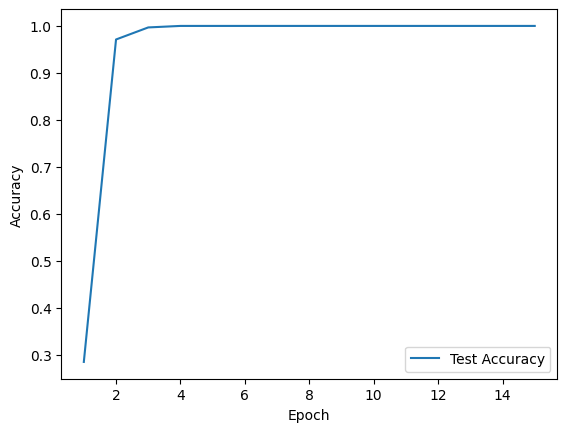

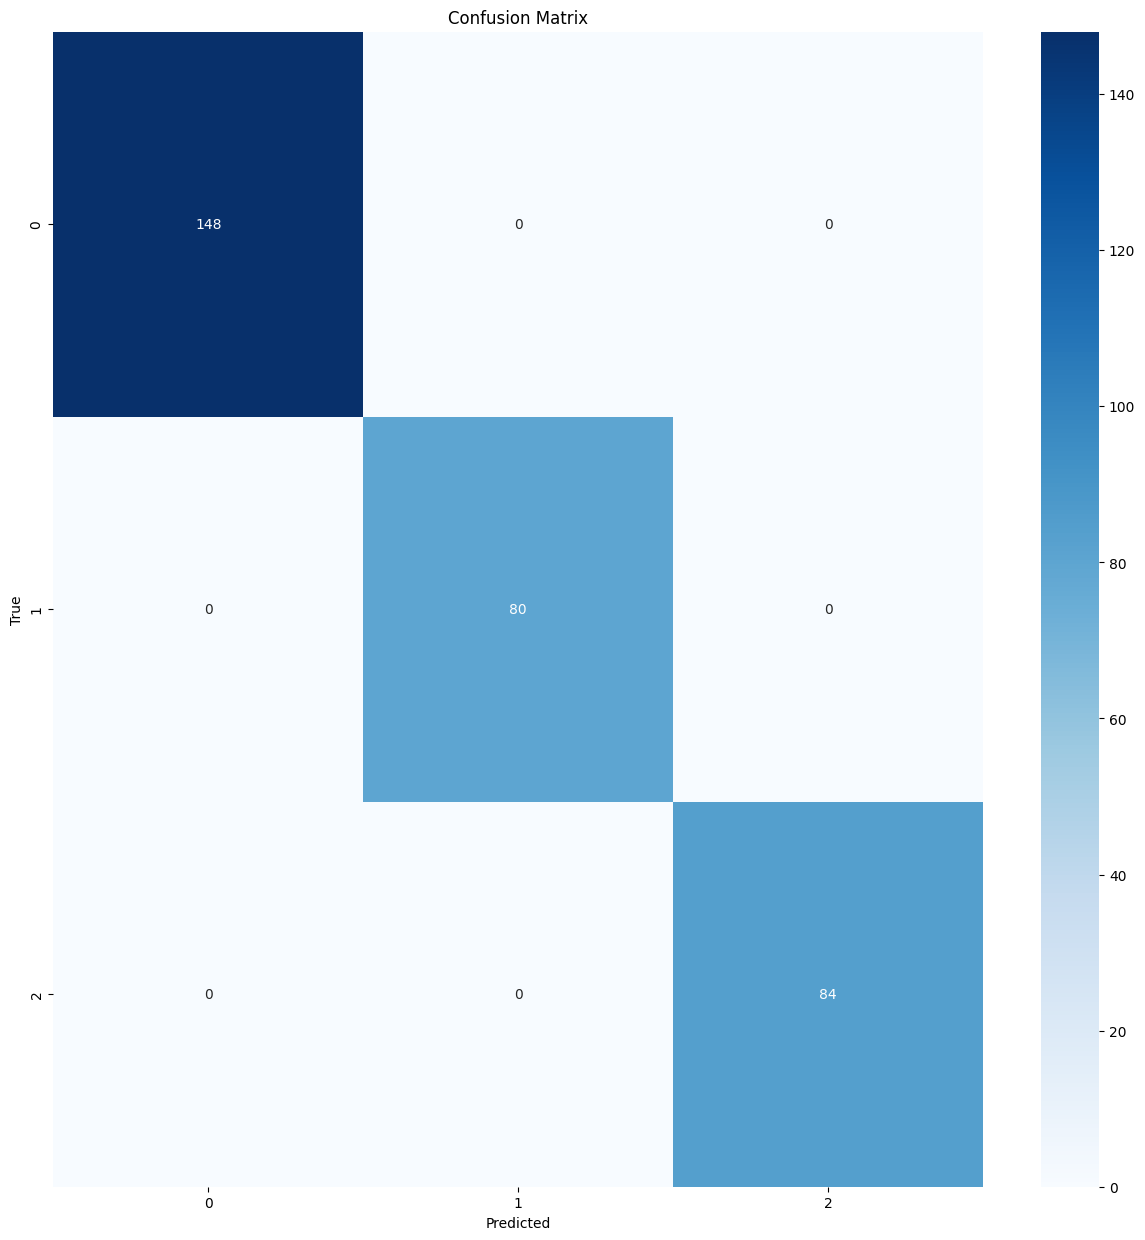

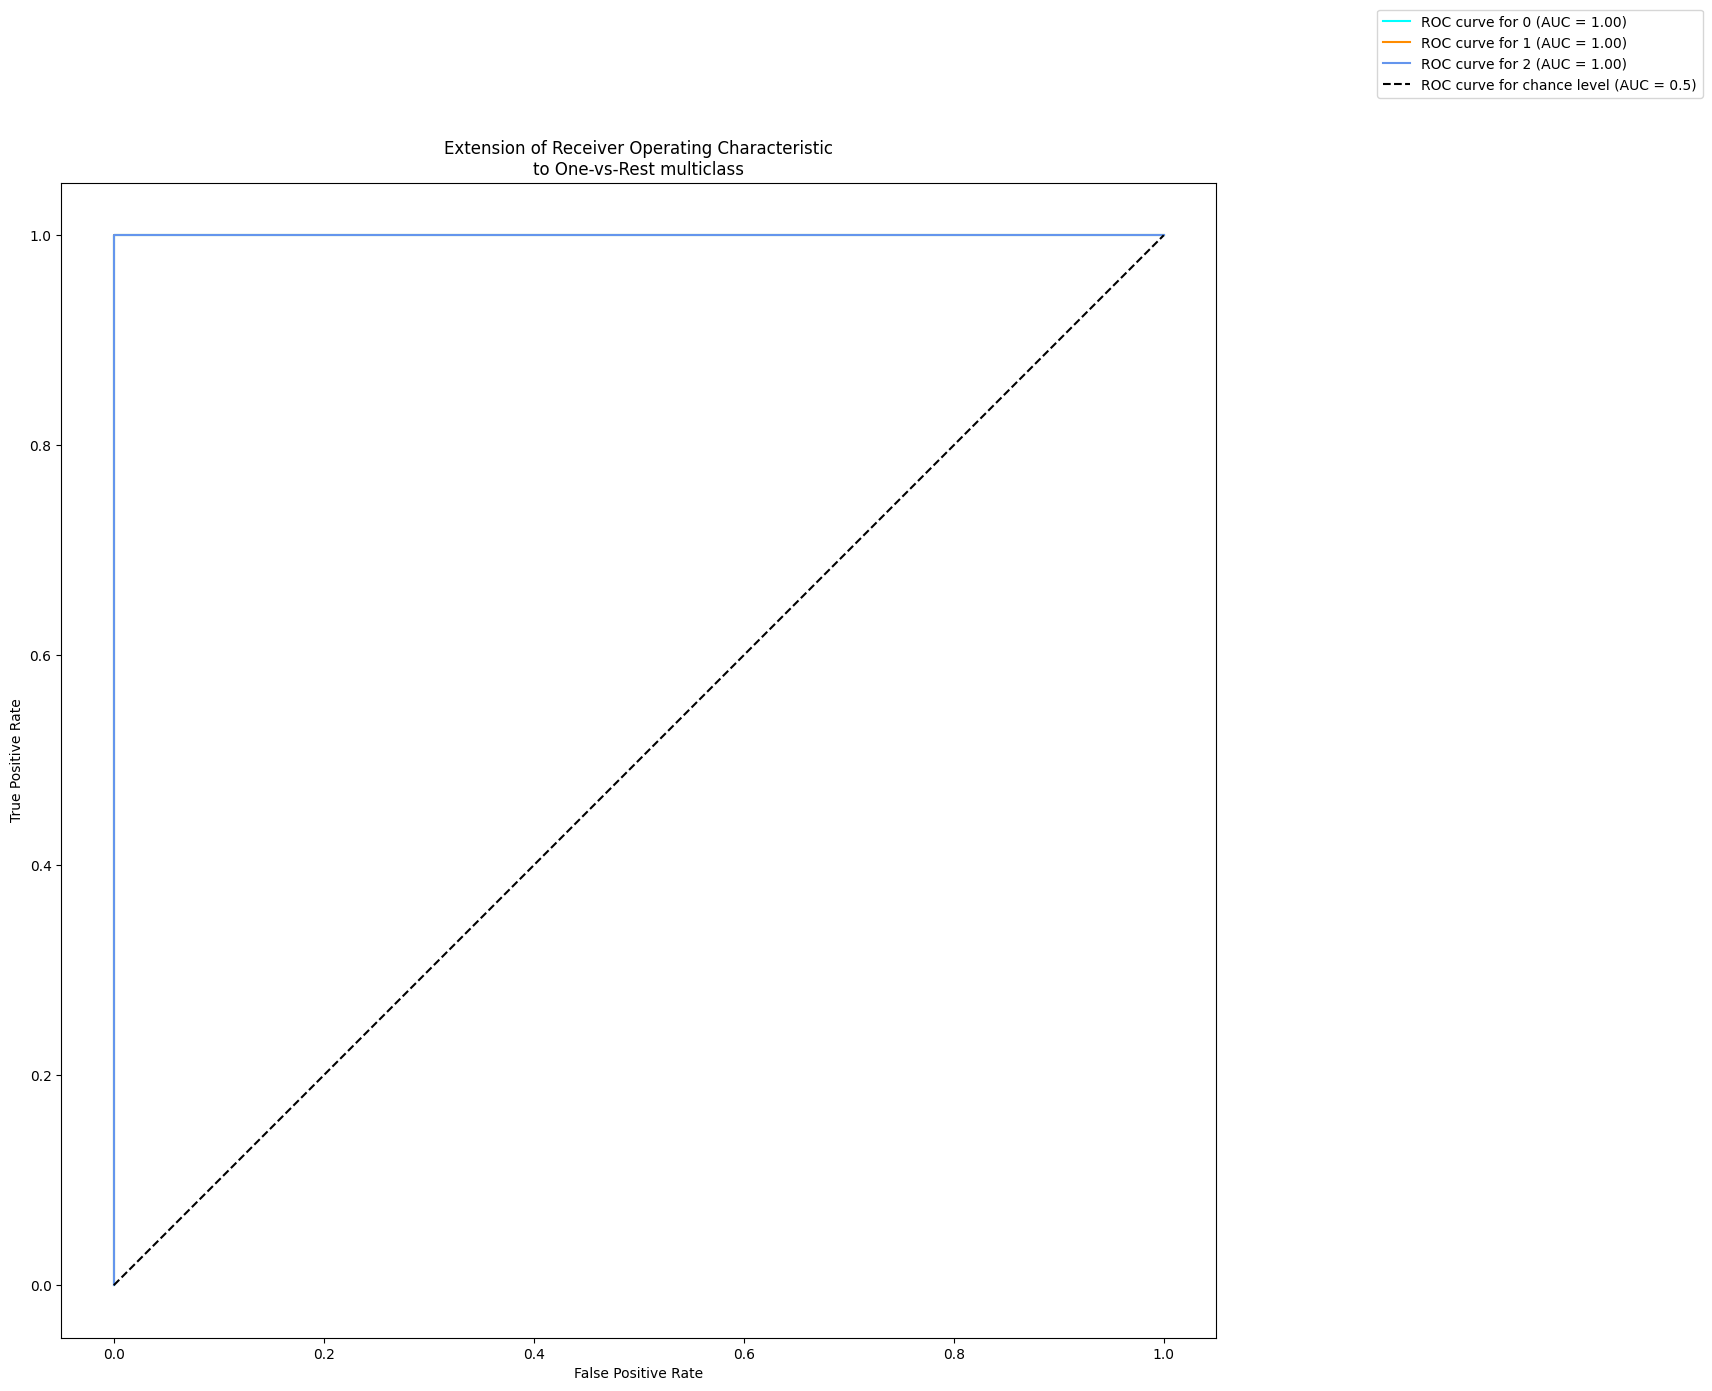

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        84

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312



In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)